In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [2]:
# 乱数を使用した時に、毎回同じ結果を得るために指定
torch.manual_seed(123)

In [3]:
a = 5
b = 2
# 0〜10の間のデータを100個作成
x = torch.linspace(0, 5, 100)

In [4]:
x

tensor([0.0000, 0.0505, 0.1010, 0.1515, 0.2020, 0.2525, 0.3030, 0.3535, 0.4040,
        0.4545, 0.5051, 0.5556, 0.6061, 0.6566, 0.7071, 0.7576, 0.8081, 0.8586,
        0.9091, 0.9596, 1.0101, 1.0606, 1.1111, 1.1616, 1.2121, 1.2626, 1.3131,
        1.3636, 1.4141, 1.4646, 1.5152, 1.5657, 1.6162, 1.6667, 1.7172, 1.7677,
        1.8182, 1.8687, 1.9192, 1.9697, 2.0202, 2.0707, 2.1212, 2.1717, 2.2222,
        2.2727, 2.3232, 2.3737, 2.4242, 2.4747, 2.5253, 2.5758, 2.6263, 2.6768,
        2.7273, 2.7778, 2.8283, 2.8788, 2.9293, 2.9798, 3.0303, 3.0808, 3.1313,
        3.1818, 3.2323, 3.2828, 3.3333, 3.3838, 3.4343, 3.4848, 3.5354, 3.5859,
        3.6364, 3.6869, 3.7374, 3.7879, 3.8384, 3.8889, 3.9394, 3.9899, 4.0404,
        4.0909, 4.1414, 4.1919, 4.2424, 4.2929, 4.3434, 4.3939, 4.4444, 4.4949,
        4.5455, 4.5960, 4.6465, 4.6970, 4.7475, 4.7980, 4.8485, 4.8990, 4.9495,
        5.0000])

In [5]:
# view：サイズ数を調整する。以下は元々1個の配列に100個データが入っていたが、100個の配列に1個のデータが入るように変形している。
# 第一引数はバッチの次元を指定する。
x = x.view(100, 1)

In [6]:
x

tensor([[0.0000],
        [0.0505],
        [0.1010],
        [0.1515],
        [0.2020],
        [0.2525],
        [0.3030],
        [0.3535],
        [0.4040],
        [0.4545],
        [0.5051],
        [0.5556],
        [0.6061],
        [0.6566],
        [0.7071],
        [0.7576],
        [0.8081],
        [0.8586],
        [0.9091],
        [0.9596],
        [1.0101],
        [1.0606],
        [1.1111],
        [1.1616],
        [1.2121],
        [1.2626],
        [1.3131],
        [1.3636],
        [1.4141],
        [1.4646],
        [1.5152],
        [1.5657],
        [1.6162],
        [1.6667],
        [1.7172],
        [1.7677],
        [1.8182],
        [1.8687],
        [1.9192],
        [1.9697],
        [2.0202],
        [2.0707],
        [2.1212],
        [2.1717],
        [2.2222],
        [2.2727],
        [2.3232],
        [2.3737],
        [2.4242],
        [2.4747],
        [2.5253],
        [2.5758],
        [2.6263],
        [2.6768],
        [2.7273],
        [2

In [7]:
eps = torch.randn(100, 1)
y = a * x + b + eps

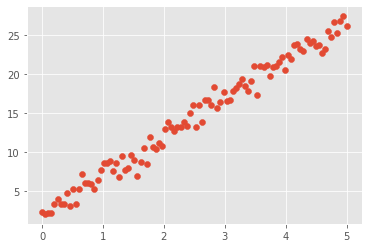

In [8]:
# 散布図を描画する。第1引数にx軸、第2引数にy軸を指定する。
plt.scatter(x, y)

In [9]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        # in_features：入力値の数、out_features：出力値の数
        self.linear = nn.Linear(in_features=1, out_features=1)
    # 順伝播、forwardを定義しておくと、学習中に自動的に呼ばれる
    def forward(self, x):
        output = self.linear(x)
        return output

In [10]:
model = LR()

In [11]:
x_test = torch.tensor([[1.0], [2.0]])

In [12]:
x_test

tensor([[1.],
        [2.]])

In [13]:
model(x_test)

tensor([[-0.6505],
        [-1.4166]], grad_fn=<AddmmBackward>)

In [14]:
x2 = torch.linspace(0, 3, 100).view(100, 1)

In [15]:
x2

tensor([[0.0000],
        [0.0303],
        [0.0606],
        [0.0909],
        [0.1212],
        [0.1515],
        [0.1818],
        [0.2121],
        [0.2424],
        [0.2727],
        [0.3030],
        [0.3333],
        [0.3636],
        [0.3939],
        [0.4242],
        [0.4545],
        [0.4848],
        [0.5152],
        [0.5455],
        [0.5758],
        [0.6061],
        [0.6364],
        [0.6667],
        [0.6970],
        [0.7273],
        [0.7576],
        [0.7879],
        [0.8182],
        [0.8485],
        [0.8788],
        [0.9091],
        [0.9394],
        [0.9697],
        [1.0000],
        [1.0303],
        [1.0606],
        [1.0909],
        [1.1212],
        [1.1515],
        [1.1818],
        [1.2121],
        [1.2424],
        [1.2727],
        [1.3030],
        [1.3333],
        [1.3636],
        [1.3939],
        [1.4242],
        [1.4545],
        [1.4848],
        [1.5152],
        [1.5455],
        [1.5758],
        [1.6061],
        [1.6364],
        [1

In [16]:
x2.size()

torch.Size([100, 1])

In [17]:
y_pred = model(x2)

In [18]:
y_pred

tensor([[ 1.1556e-01],
        [ 9.2342e-02],
        [ 6.9127e-02],
        [ 4.5912e-02],
        [ 2.2697e-02],
        [-5.1795e-04],
        [-2.3733e-02],
        [-4.6948e-02],
        [-7.0163e-02],
        [-9.3378e-02],
        [-1.1659e-01],
        [-1.3981e-01],
        [-1.6302e-01],
        [-1.8624e-01],
        [-2.0945e-01],
        [-2.3267e-01],
        [-2.5588e-01],
        [-2.7910e-01],
        [-3.0231e-01],
        [-3.2553e-01],
        [-3.4874e-01],
        [-3.7196e-01],
        [-3.9517e-01],
        [-4.1839e-01],
        [-4.4160e-01],
        [-4.6482e-01],
        [-4.8803e-01],
        [-5.1125e-01],
        [-5.3446e-01],
        [-5.5768e-01],
        [-5.8089e-01],
        [-6.0411e-01],
        [-6.2732e-01],
        [-6.5054e-01],
        [-6.7375e-01],
        [-6.9697e-01],
        [-7.2018e-01],
        [-7.4340e-01],
        [-7.6661e-01],
        [-7.8983e-01],
        [-8.1304e-01],
        [-8.3626e-01],
        [-8.5947e-01],
        [-8

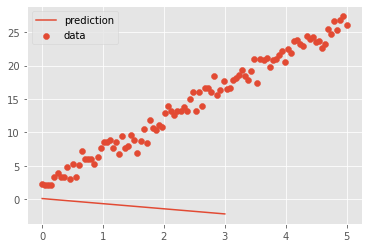

In [19]:
# 順伝播をしているので、勾配計算処理を外す => detach()
# plot：一本の線を描画
plt.plot(x2, y_pred.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()

In [20]:
# 損失関数
criterion = nn.MSELoss()
# 最適化関数
# 第1引数：model.parameters() => 重みとバイアスの情報が入っている。これを更新したい。
# 第2引数：学習率
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [21]:
losses = []
num_epoch = 500
for epoch in range(num_epoch):
    # ミニバッチのloopがないため、バッチ学習
    
    # 勾配の初期化を行う
    optimizer.zero_grad()
    # 予測値の計算
    y_pred = model(x)
    # 損失の計算：予想値と正解値を与える
    loss = criterion(y_pred, y)
    # 損失を誤差逆伝播する
    loss.backward()
    # 重みとバイアスの更新
    optimizer.step()
    if epoch % 10 == 0:
        print("epoch: {}, loss: {}".format(epoch, loss.item()))
        losses.append(loss.item())

epoch: 0, loss: 334.3143005371094
epoch: 10, loss: 231.43626403808594
epoch: 20, loss: 160.3110809326172
epoch: 30, loss: 111.13833618164062
epoch: 40, loss: 77.14257049560547
epoch: 50, loss: 53.63942337036133
epoch: 60, loss: 37.39039611816406
epoch: 70, loss: 26.156522750854492
epoch: 80, loss: 18.38991355895996
epoch: 90, loss: 13.020407676696777
epoch: 100, loss: 9.308155059814453
epoch: 110, loss: 6.741643905639648
epoch: 120, loss: 4.967243194580078
epoch: 130, loss: 3.740471124649048
epoch: 140, loss: 2.8923027515411377
epoch: 150, loss: 2.3058886528015137
epoch: 160, loss: 1.900444746017456
epoch: 170, loss: 1.6201138496398926
epoch: 180, loss: 1.426276683807373
epoch: 190, loss: 1.2922366857528687
epoch: 200, loss: 1.1995415687561035
epoch: 210, loss: 1.1354293823242188
epoch: 220, loss: 1.0910781621932983
epoch: 230, loss: 1.060388445854187
epoch: 240, loss: 1.0391433238983154
epoch: 250, loss: 1.0244296789169312
epoch: 260, loss: 1.0142309665679932
epoch: 270, loss: 1.00715

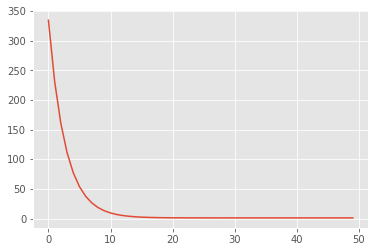

In [22]:
plt.plot(losses)

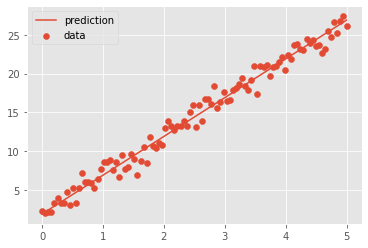

In [23]:
x_test = torch.linspace(0, 5, 100).view(100, 1)
y_test = model(x_test)
plt.plot(x_test, y_test.detach(), label="prediction")
plt.scatter(x, y, label="data")
plt.legend()